# Map of Waterpoints in Tanzania

In [1]:
import geopandas

from pylab import rcParams

import matplotlib.pyplot as plt

import pandas as pd

In [3]:
DATA_PATH = 'data/'

In [4]:
df = pd.read_csv(DATA_PATH+'clean_water_well_data.csv')

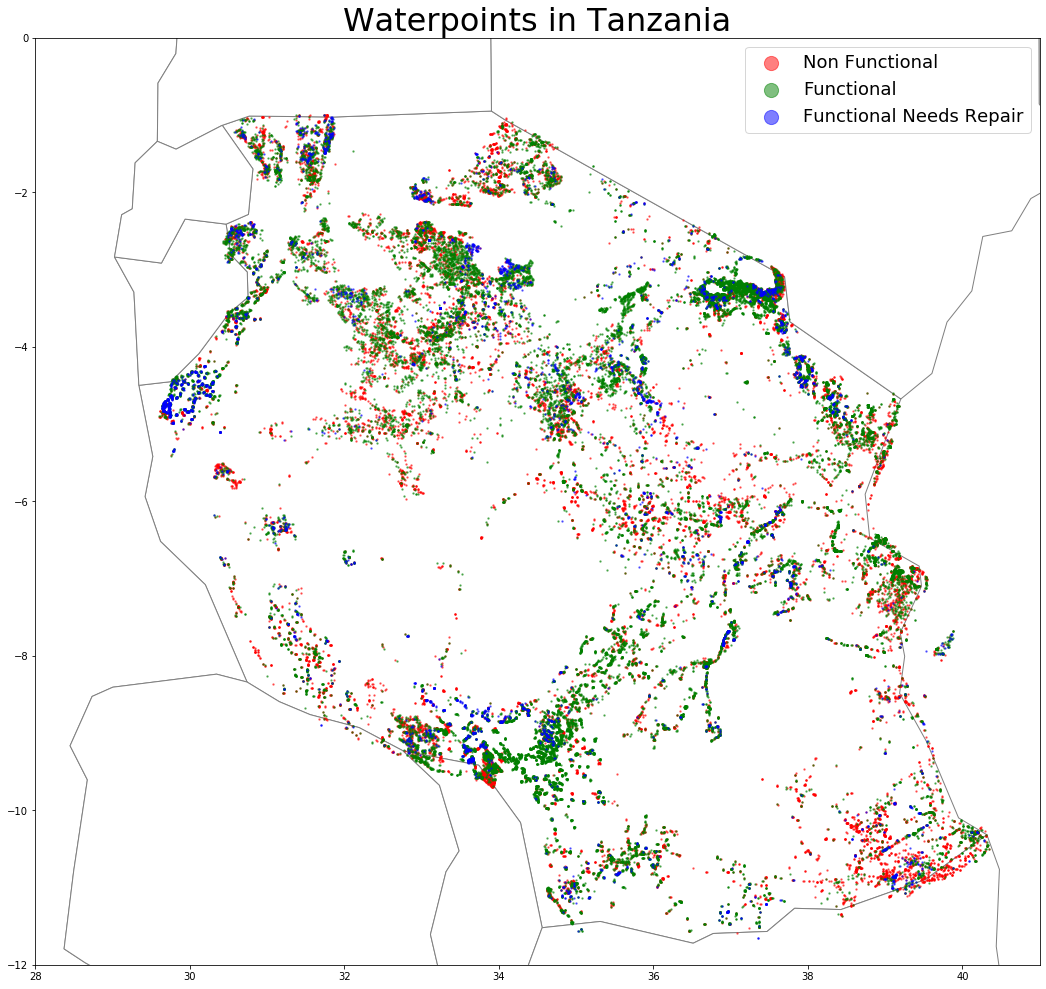

In [5]:
rcParams['figure.figsize'] = 18, 30

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

functional = gdf.where(gdf['status_group'] == 'functional')
repair = gdf.where(gdf['status_group'] == 'functional needs repair')
broken = gdf.where(gdf['status_group'] == 'non functional')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='gray')

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=2, label='Non Functional')

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=2, label='Functional')

ax.scatter(repair['longitude'], repair['latitude'],
           c='blue', alpha=.5, s=2, label='Functional Needs Repair')


plt.ylim(-12, 0)
plt.xlim(28,41)

plt.legend(fontsize=18, markerscale=10)

plt.title('Waterpoints in Tanzania', fontsize=32)

plt.show()